In [97]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [98]:
#read csv file (output.csv is the output file obtained after data analytics)
df = pd.read_csv('output.csv')

In [99]:
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.816895,0,1,1,1,0.934478,0.632212,1,1,0,0,1,0,0,1,0,0
1,51676,0.743652,0,0,1,0,0.791913,0.427885,1,0,0,0,0,1,0,0,1,0
2,31112,0.975586,0,1,1,0,0.273501,0.533654,1,1,0,0,1,0,0,0,1,0
3,60182,0.597168,0,0,1,1,0.625121,0.579327,1,0,0,0,1,0,0,0,0,1
4,1665,0.963379,1,0,1,0,0.640681,0.329327,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,18234,0.975586,1,0,1,1,0.154140,0.427885,0,0,0,0,1,0,0,0,1,0
4998,44873,0.987793,0,0,1,1,0.377302,0.713942,0,0,0,0,0,1,0,0,1,0
4999,19723,0.426270,0,0,1,0,0.150048,0.487981,0,0,0,0,0,1,0,0,1,0
5000,37544,0.621582,0,0,1,0,0.598525,0.367788,0,1,0,0,1,0,0,1,0,0


In [100]:
#considering stroke as a target column and moving at the end of df 
colmn=df.pop("stroke")
df.insert(17,"stroke",colmn)
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,0.816895,0,1,1,1,0.934478,0.632212,1,0,0,1,0,0,1,0,0,1
1,51676,0.743652,0,0,1,0,0.791913,0.427885,0,0,0,0,1,0,0,1,0,1
2,31112,0.975586,0,1,1,0,0.273501,0.533654,1,0,0,1,0,0,0,1,0,1
3,60182,0.597168,0,0,1,1,0.625121,0.579327,0,0,0,1,0,0,0,0,1,1
4,1665,0.963379,1,0,1,0,0.640681,0.329327,0,0,0,0,1,0,0,1,0,1


[2.75131631e-01 2.58691022e-02 2.47911444e-02 2.03433991e-02
 3.08158220e-02 2.64684167e-01 2.38395489e-01 3.39166318e-02
 1.65441868e-06 4.14128873e-05 2.20700519e-02 1.63876162e-02
 1.83156766e-03 2.11031226e-02 2.46171875e-02]


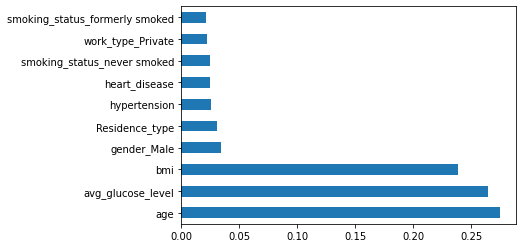

In [101]:
#Top 10 important features in df, higher the score more relevant the feature towards output variable.
import pandas as pd
import numpy as np

X = df.iloc[:,1:16]  #independent columns
y = df.iloc[:,-1]    #target column i.e stroke

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [102]:
#new dataframe creation with features having high scores along with target column
new_df = df[['age','avg_glucose_level', 'bmi','Residence_type','gender_Male','hypertension','stroke']].copy()
new_df.head()

,age,avg_glucose_level,bmi,Residence_type,gender_Male,hypertension,stroke
0,0.816895,0.934478,0.632212,1,1,0,1
1,0.743652,0.791913,0.427885,0,0,0,1
2,0.975586,0.273501,0.533654,0,1,0,1
3,0.597168,0.625121,0.579327,1,0,0,1
4,0.963379,0.640681,0.329327,0,0,1,1


In [103]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X =new_df.drop(columns = ['stroke']).copy()
y =new_df['stroke']

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(4001, 6)
(4001,)
(500, 6)
(500,)
(501, 6)
(501,)


(None, None)

In [104]:
X_train

,age,avg_glucose_level,bmi,Residence_type,gender_Male,hypertension
1681,0.267578,0.009260,0.471154,1,0,0
501,0.816895,0.072144,0.382212,1,1,0
2765,0.414062,0.032249,0.456731,1,1,0
4567,0.536133,0.272639,0.531250,1,1,0
4327,0.133301,0.134381,0.276442,0,1,0
...,...,...,...,...,...,...
3597,0.780273,0.197750,0.516827,0,1,1
4365,0.658203,0.184613,0.771635,0,1,0
1436,0.426270,0.254226,0.576923,0,1,0
4666,0.206543,0.354474,0.286058,0,0,0


In [105]:
y_train

1681    0
501     0
2765    0
4567    0
4327    0
       ..
3597    0
4365    0
1436    0
4666    0
744     0
Name: stroke, Length: 4001, dtype: int64

In [106]:
#to predict the value of a variable based on the value of another variable
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()